In [1]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
keras.__version__

'2.4.0'

In [3]:
from google.colab import files
uploaded = files.upload()


Saving hcvdat0.csv to hcvdat0.csv


In [165]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hcvdat0.csv']))

In [166]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Analyse exploratoire des données

In [167]:
df.shape

(615, 14)

In [168]:
df= df.drop('Unnamed: 0', axis=1 )
#df.reset_index(inplace=True)

In [169]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [9]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [170]:
df1=df.copy()

In [11]:
df1.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [12]:
df1.dtypes.value_counts()

float64    10
object      2
int64       1
dtype: int64

<Figure size 1440x720 with 0 Axes>

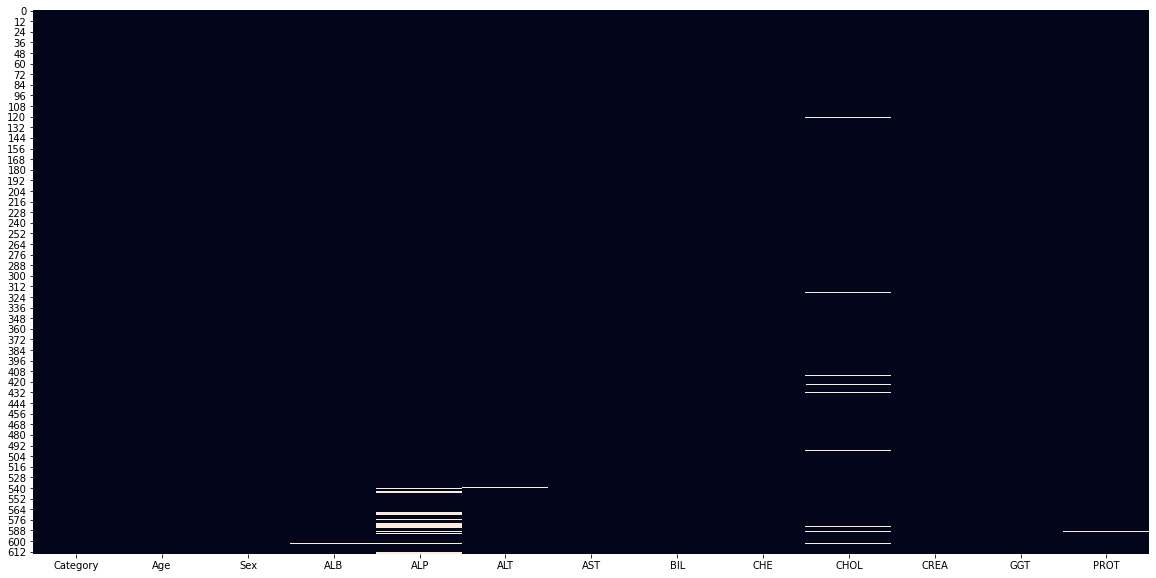

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)

In [14]:
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=False)

ALP         0.029268
CHOL        0.016260
PROT        0.001626
ALT         0.001626
ALB         0.001626
GGT         0.000000
CREA        0.000000
CHE         0.000000
BIL         0.000000
AST         0.000000
Sex         0.000000
Age         0.000000
Category    0.000000
dtype: float64

In [15]:
df1['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

Age


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


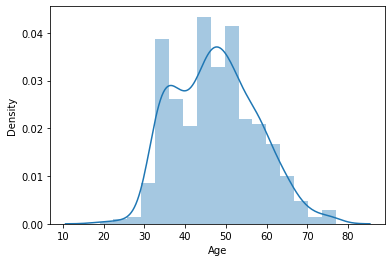

In [16]:
for col in df1.select_dtypes('int64'):
    print(col)
    plt.figure()
    sns.distplot(df1[col])

ALB


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ALP


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ALT


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AST


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BIL


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CHE


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CHOL


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CREA


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


GGT


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


PROT


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


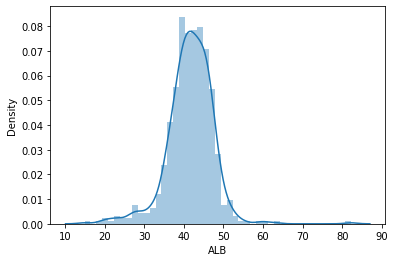

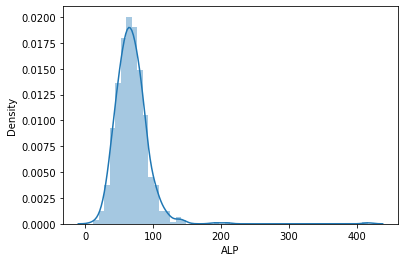

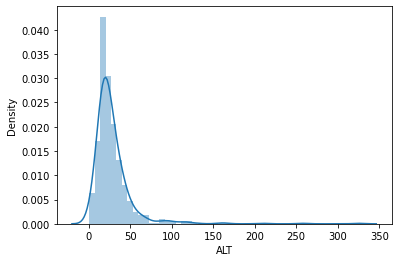

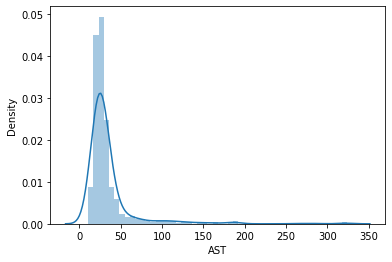

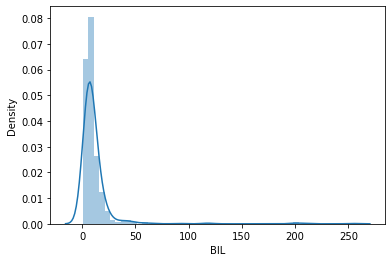

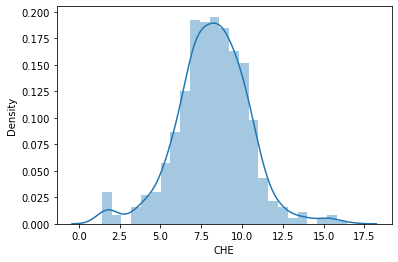

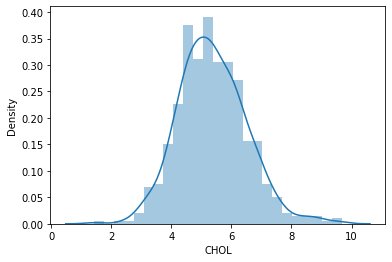

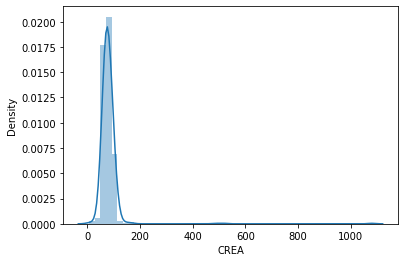

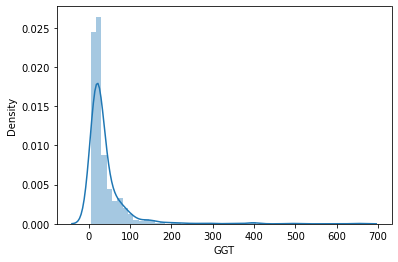

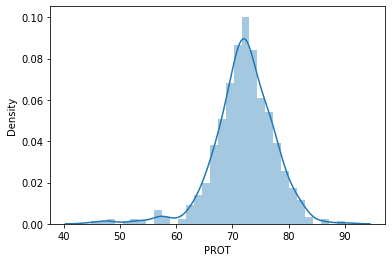

In [17]:
for col in df1.select_dtypes('float64'):
    print(col)
    plt.figure()
    sns.distplot(df1[col])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

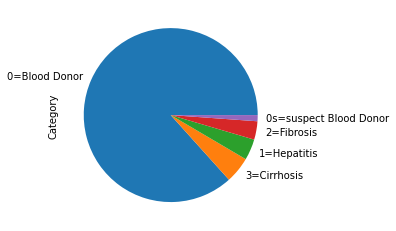

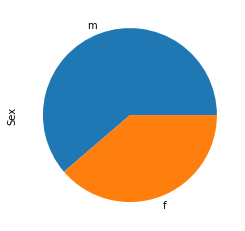

In [18]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

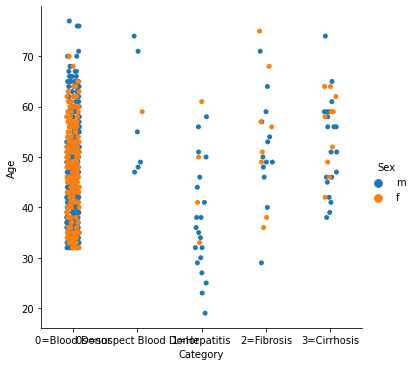

In [19]:
sns.catplot(x='Category' , y='Age', data=df1, hue='Sex')

In [20]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Category------------ ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Sex----------------- ['m' 'f']


In [21]:
'''
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, LabelBinarizer, scale
labenc = LabelEncoder()
labenc.fit(df1.iloc[:,0])
Xl = labenc.transform(df1.iloc[:,0]).reshape((-1,1))
df1.iloc[:,0]=Xl
#ohenc = OneHotEncoder(sparse=False)
#ohenc.fit(Xl)
#xt=ohenc.transform(Xl)
'''
    

LabelEncoder()

In [171]:
 labels = df1.pop("Category")
 labels= pd.get_dummies(labels) 
 labels

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
610,0,0,0,0,1
611,0,0,0,0,1
612,0,0,0,0,1
613,0,0,0,0,1


In [172]:
df1 = pd.concat([labels, df1], axis=1)
df1

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,0,0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,0,0,0,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,0,0,0,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,0,0,0,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,0,0,0,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,0,0,0,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,0,0,0,1,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,0,0,0,1,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [173]:
val_df = df1.sample(frac=0.1, random_state=1337)
train_df = df1.drop(val_df.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_df), len(val_df))
)

Using 553 samples for training and 62 for validation


In [174]:
train_df

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,0,0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,0,0,0,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,0,0,0,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,1,0,0,0,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,1,0,0,0,0,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,0,0,0,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,0,0,0,1,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,0,0,0,1,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [162]:
 '''
 labels = train_df.pop("Category")
 labels= pd.get_dummies(labels) 
 labels
 train_df= pd.concat([labels, train_df], axis=1)
 train_df
 '''

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
610,0,0,0,0,1
611,0,0,0,0,1
612,0,0,0,0,1
613,0,0,0,0,1


,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,0,0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,0,0,0,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,0,0,0,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,1,0,0,0,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,1,0,0,0,0,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,0,0,0,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,0,0,0,1,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,0,0,0,1,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [175]:
train_df=train_df.fillna(0)
train_df
val_df=val_df.fillna(0)
val_df

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,0,0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,0,0,0,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,0,0,0,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,1,0,0,0,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,1,0,0,0,0,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,0,0,0,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,0,0,0,1,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,0,0,0,1,46,f,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
357,1,0,0,0,0,37,f,42.1,47.5,18.3,21.7,2.8,8.29,4.36,83.0,28.9,73.4
546,0,0,1,0,0,30,m,45.0,0.0,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77.0
187,1,0,0,0,0,49,m,39.7,77.3,20.2,19.0,8.8,7.26,4.98,84.0,74.5,65.4
32,1,0,0,0,0,34,m,43.6,58.9,47.1,31.1,18.5,9.14,4.99,95.0,22.2,69.3
549,0,0,1,0,0,34,m,46.0,36.7,7.4,31.6,9.0,9.71,5.37,82.3,34.4,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0,0,0,0,1,65,m,0.0,0.0,40.0,54.0,13.0,7.50,0.00,70.0,107.0,79.0
13,1,0,0,0,0,33,m,39.0,51.7,15.9,24.0,6.8,6.46,3.38,65.0,7.0,70.4
525,1,0,0,0,0,63,f,47.6,59.9,21.1,27.8,8.4,9.24,6.08,62.0,18.3,74.5
213,1,0,0,0,0,51,m,46.3,69.4,20.1,26.8,4.5,9.99,4.14,81.0,12.3,73.9


In [197]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    col= ['0=Blood Donor','0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis' ]
    labels= dataframe[col]
    #labels = dataframe.pop("Category")
    #labels= pd.get_dummies(labels)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_df)
val_ds = dataframe_to_dataset(val_df)

In [198]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'0=Blood Donor': <tf.Tensor: shape=(), dtype=uint8, numpy=1>, '0s=suspect Blood Donor': <tf.Tensor: shape=(), dtype=uint8, numpy=0>, '1=Hepatitis': <tf.Tensor: shape=(), dtype=uint8, numpy=0>, '2=Fibrosis': <tf.Tensor: shape=(), dtype=uint8, numpy=0>, '3=Cirrhosis': <tf.Tensor: shape=(), dtype=uint8, numpy=0>, 'Age': <tf.Tensor: shape=(), dtype=int64, numpy=46>, 'Sex': <tf.Tensor: shape=(), dtype=string, numpy=b'f'>, 'ALB': <tf.Tensor: shape=(), dtype=float64, numpy=42.3>, 'ALP': <tf.Tensor: shape=(), dtype=float64, numpy=61.9>, 'ALT': <tf.Tensor: shape=(), dtype=float64, numpy=20.0>, 'AST': <tf.Tensor: shape=(), dtype=float64, numpy=21.8>, 'BIL': <tf.Tensor: shape=(), dtype=float64, numpy=9.7>, 'CHE': <tf.Tensor: shape=(), dtype=float64, numpy=8.8>, 'CHOL': <tf.Tensor: shape=(), dtype=float64, numpy=7.09>, 'CREA': <tf.Tensor: shape=(), dtype=float64, numpy=67.0>, 'GGT': <tf.Tensor: shape=(), dtype=float64, numpy=35.0>, 'PROT': <tf.Tensor: shape=(), dtype=float64, numpy=75.2>}


In [199]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [196]:
train_ds

<BatchDataset shapes: ({0=Blood Donor: (None, None), 0s=suspect Blood Donor: (None, None), 1=Hepatitis: (None, None), 2=Fibrosis: (None, None), 3=Cirrhosis: (None, None), Age: (None, None), Sex: (None, None), ALB: (None, None), ALP: (None, None), ALT: (None, None), AST: (None, None), BIL: (None, None), CHE: (None, None), CHOL: (None, None), CREA: (None, None), GGT: (None, None), PROT: (None, None)}, (None, None, 5)), types: ({0=Blood Donor: tf.uint8, 0s=suspect Blood Donor: tf.uint8, 1=Hepatitis: tf.uint8, 2=Fibrosis: tf.uint8, 3=Cirrhosis: tf.uint8, Age: tf.int64, Sex: tf.string, ALB: tf.float64, ALP: tf.float64, ALT: tf.float64, AST: tf.float64, BIL: tf.float64, CHE: tf.float64, CHOL: tf.float64, CREA: tf.float64, GGT: tf.float64, PROT: tf.float64}, tf.uint8)>

## Feature preprocessing with Keras layers

In [182]:


encoder = tf.keras.layers.experimental.preprocessing.CategoryEncoding(
    max_tokens=None, output_mode="binary", sparse=False
    )

encoder



In [190]:


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, dtype=None
)

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = tf.keras.layers.experimental.preprocessing.StringLookup(
   
              )

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = tf.keras.layers.experimental.preprocessing.CategoryEncoding(
    max_tokens=None, output_mode="binary", sparse=False
    )

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):

    

    # Create a CategoryEncoding for our integer indices
    encoder = tf.keras.layers.experimental.preprocessing.CategoryEncoding(
    max_tokens=None, output_mode="binary", sparse=False
    )

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature

In [193]:
# Categorical features encoded as integers
Sex = keras.Input(shape=(1,), name="Sex", dtype="string")
# Categorical feature encoded as string
#Category = keras.Input(shape=(1,), name= "Category", dtype="string")
# Numerical features
Age = keras.Input(shape=(1,), name="Age")
ALB = keras.Input(shape=(1,), name="ALB")
ALP = keras.Input(shape=(1,), name="ALP")
ALT = keras.Input(shape=(1,), name="ALT")
AST = keras.Input(shape=(1,), name="AST")
BIL = keras.Input(shape=(1,), name="BIL")
CHE = keras.Input(shape=(1,), name="CHE")
CHOL = keras.Input(shape=(1,), name="CHOL")
CREA = keras.Input(shape=(1,), name="CREA")
GGT = keras.Input(shape=(1,), name="GGT")
PROT = keras.Input(shape=(1,), name="PROT")


In [34]:
type(Category)

tensorflow.python.keras.engine.keras_tensor.KerasTensor

In [194]:
all_inputs =[Sex, Age, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT,]  

In [200]:
# Integer categorical features
Sex_encoded = encode_string_categorical_feature( Sex, "Sex", train_ds)
# String categorical features
#Category_encoded = encode_string_categorical_feature( Category, "Category", train_ds)
# Numerical features
Age_encoded = encode_numerical_feature(Age, "Age", train_ds)
ALB_encode = encode_numerical_feature(ALB, "ALB", train_ds)
ALP_encode = encode_numerical_feature(ALP, "ALP", train_ds)
ALT_encode = encode_numerical_feature(ALT, "ALT", train_ds)
AST_encode = encode_numerical_feature(AST, "AST", train_ds)
BIL_encode = encode_numerical_feature(BIL, "BIL", train_ds)
CHE_encode = encode_numerical_feature(CHE, "CHE", train_ds)
CHOL_encode = encode_numerical_feature(CHOL, "CHOL", train_ds)
CREA_encode = encode_numerical_feature(CREA, "CREA", train_ds)
GGT_encode = encode_numerical_feature(GGT, "GGT", train_ds)
PROT_encode = encode_numerical_feature(PROT, "PROT", train_ds)




In [201]:
ALB_encode

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_34')>

In [202]:
all_features = layers.concatenate([Sex_encoded,Age_encoded,ALB_encode,ALP_encode,ALT_encode,AST_encode,BIL_encode,CHE_encode,CHOL_encode,CREA_encode,GGT_encode,PROT_encode]  )          

In [225]:
x_input = layers.Dense(32, activation="relu")(all_features)
#x = layers.Dropout(0.2)(x_input)
#hidden2 = layers.Dense(32, kernel_initializer= 'he_normal',activation='tanh')(x)
output = layers.Dense(5, activation="softmax")(x_input)
model = keras.Model(all_inputs  , output)


In [79]:
from tensorflow.keras.optimizers import Adam

In [226]:
model.compile(optimizer= Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [63]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sex (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
string_lookup (StringLookup)    (None, 1)            0           Sex[0][0]                        
__________________________________________________________________________________________________
Age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
ALB (InputLayer)                [(None, 1)]          0                                            
____________________________________________________________________________________________

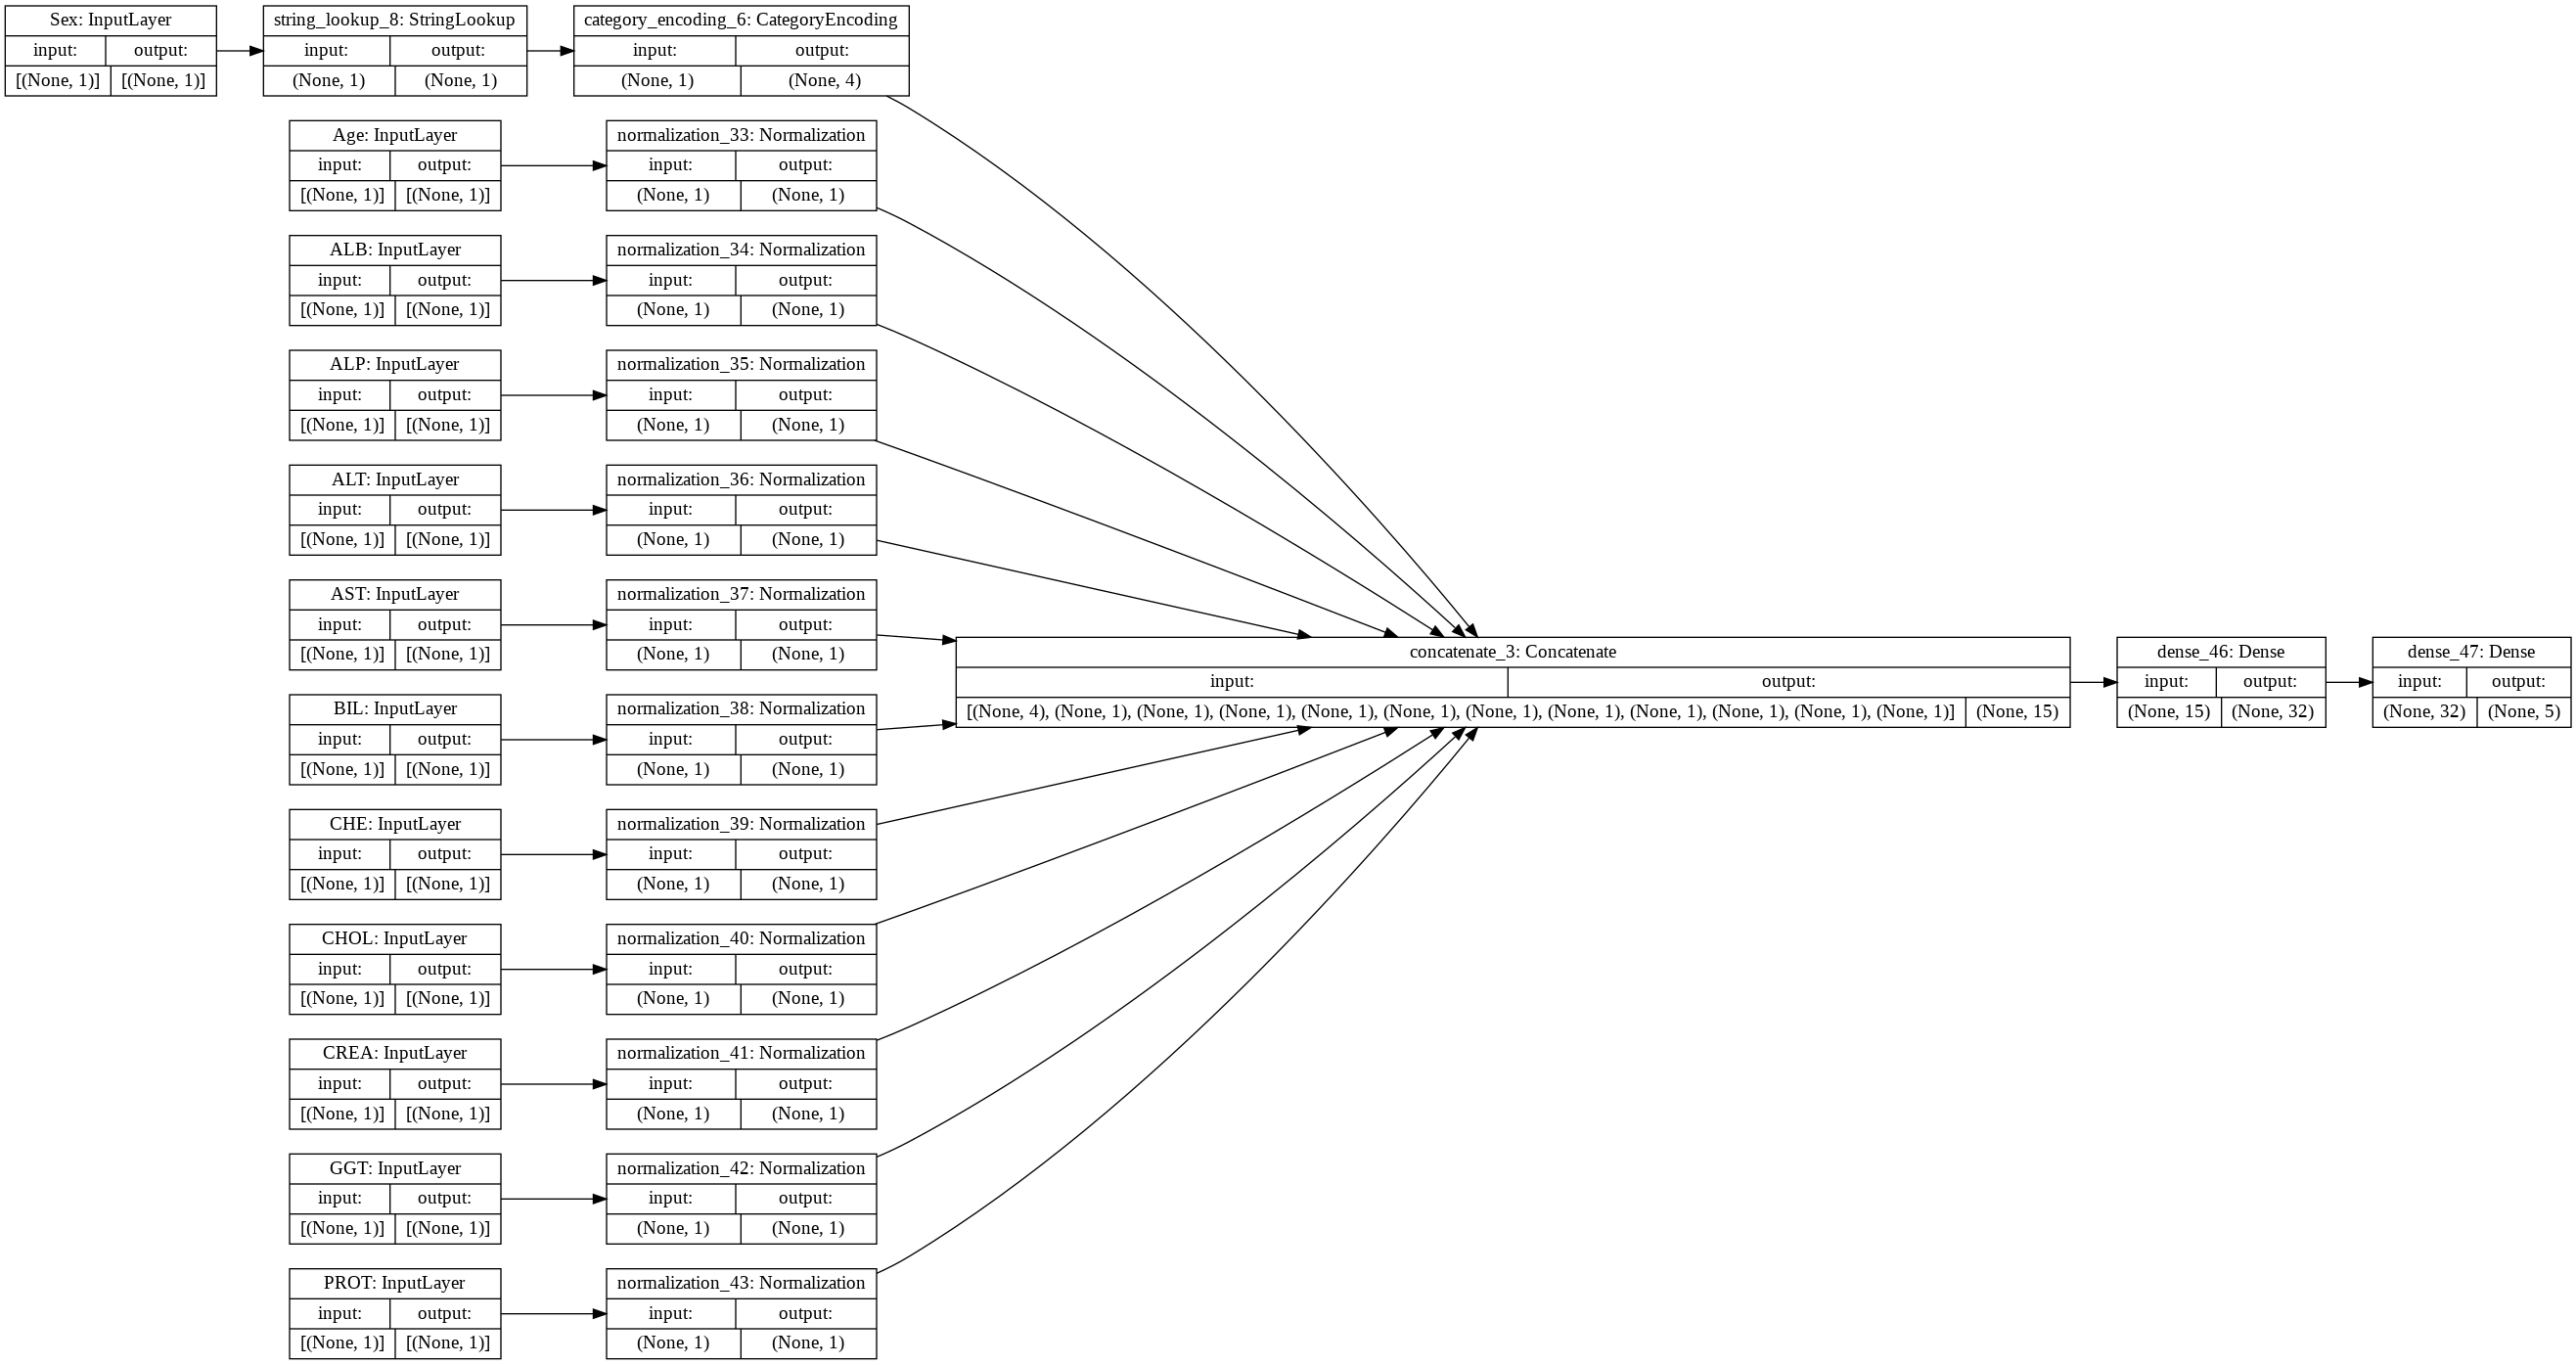

In [227]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [228]:
model.fit(train_ds, epochs=45, validation_data=val_ds)

Epoch 1/45


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:595: UserWarning: Input dict contained keys ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


18/18 [==============================] - 1s 22ms/step - loss: 1.5969 - accuracy: 0.2578 - val_loss: 1.4014 - val_accuracy: 0.5484
Epoch 2/45
18/18 [==============================] - 0s 5ms/step - loss: 1.3355 - accuracy: 0.6285 - val_loss: 1.1547 - val_accuracy: 0.7742
Epoch 3/45
18/18 [==============================] - 0s 4ms/step - loss: 1.1076 - accuracy: 0.8323 - val_loss: 0.9498 - val_accuracy: 0.9194
Epoch 4/45
18/18 [==============================] - 0s 4ms/step - loss: 0.9320 - accuracy: 0.8772 - val_loss: 0.7834 - val_accuracy: 0.9516
Epoch 5/45
18/18 [==============================] - 0s 4ms/step - loss: 0.7668 - accuracy: 0.8856 - val_loss: 0.6438 - val_accuracy: 0.9516
Epoch 6/45
18/18 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.8846 - val_loss: 0.5374 - val_accuracy: 0.9516
Epoch 7/45
18/18 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.9160 - val_loss: 0.4532 - val_accuracy: 0.9516
Epoch 8/45
18/18 [============

In [229]:
score = model.evaluate(val_ds, verbose=0)
print('Test score:', score[0])

Test score: 0.06663088500499725


In [237]:
### PREDICTION

In [230]:
predictions = model.predict(x=val_ds, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:595: UserWarning: Input dict contained keys ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


In [236]:
predictions[60]

array([9.9091899e-01, 6.3914564e-03, 1.1068704e-03, 6.7191635e-04,
       9.1069948e-04], dtype=float32)